In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
%cd gdrive/MyDrive/DISSERTATION/SFC-CAE-AdaptiveFinal/

/content/gdrive/MyDrive/DISSERTATION/SFC-CAE-AdaptiveFinal


In [ ]:
#!git clone https://github.com/acse-jy220/SFC-CAE-Ready-to-use

### Install dependencies

In [ ]:
modulelist = !pip list                         #This is just to check whether the requirements are already installed
if str(modulelist).find("vtk") == -1:          #If vtk is already installed don't start the installation process because it will take a couple minutes to verify that everything is there.
  !pip install -e .

Obtaining file:///content/gdrive/MyDrive/DISSERTATION/SFC-CAE-AdaptiveFinal
     |████████████████████████████████| 59.5 MB 36 kB/s 
     |████████████████████████████████| 163 kB 69.0 MB/s 
     |████████████████████████████████| 223 kB 67.7 MB/s 
     |████████████████████████████████| 1.1 MB 64.3 MB/s 
     |████████████████████████████████| 1.7 MB 55.3 MB/s 
     |████████████████████████████████| 3.7 MB 55.8 MB/s 
     |████████████████████████████████| 83 kB 3.0 MB/s 
     |████████████████████████████████| 1.8 MB 53.9 MB/s 
     |████████████████████████████████| 495 kB 59.5 MB/s 
     |████████████████████████████████| 3.1 MB 46.3 MB/s 
     |████████████████████████████████| 3.0 MB 37.0 MB/s 
     |████████████████████████████████| 74 kB 4.4 MB/s 
     |████████████████████████████████| 251 kB 72.6 MB/s 
     |████████████████████████████████| 170 kB 78.4 MB/s 
     |████████████████████████████████| 133 kB 79.3 MB/s 
     |████████████████████████████████| 97 kB 8.7 MB/s 
   

### Import useful functions inside this repo, very important, don't forget!!!

In [ ]:
from sfc_cae import *

Load tensors

You can download the adaptive data from the link in the readme

In [ ]:
# data_path = "FPC_CG_Adaptive/"

In [ ]:
# full_tensor, coords, cells = read_in_files_adaptive(data_path)

Or just import pre-saved ones

In [ ]:
# import pickle

# pickle_out = open("full_tensor_adaptive_cg.pickle","wb")
# pickle.dump(full_tensor, pickle_out)
# pickle_out.close()

# pickle_out = open("coords_adaptive_cg.pickle","wb")
# pickle.dump(coords, pickle_out)
# pickle_out.close()

# pickle_out = open("cells_adaptive_cg.pickle","wb")
# pickle.dump(cells, pickle_out)
# pickle_out.close()

In [ ]:
import pickle
pickle_in = open("full_tensor_adaptive_cg.pickle","rb")
full_tensor = pickle.load(pickle_in)

pickle_in = open("coords_adaptive_cg.pickle","rb")
coords = pickle.load(pickle_in)

pickle_in = open("cells_adaptive_cg.pickle","rb")
cells = pickle.load(pickle_in)

Standardise the velocities and coordinates

In [ ]:
full_tensor, k, b = standardlize_listoftensors_adaptive(full_tensor, lower = -1, upper = 1)

### Generate space-filling-curves from `vtu` files, one by one




In [ ]:
# fpc_space_filling_orderings = []
# fpc_invert_space_filling_orderings = []

# ncurves = 10 #Curves for each frame

# for i in range(2000):
  
#   #Choose the correct template_vtu
#   filename = data_path + "fpc_cg_" + str(i) + ".vtu"
#   print("Loading", filename)
#   template_vtu = vtktools.vtu(filename)

#   #Append a list
#   fpc_space_filling_orderings.append([])
#   fpc_invert_space_filling_orderings.append([])
  
#   #np.roll(coords[i][:,:2],random.randint(0,100)) <-- Check later

#   print("Generating", ncurves, "curves")
#   #Generate and append ncurves space filling curves
#   space_filling_ordering, invert_space_filling_ordering = get_sfc_curves_from_coords_CG(coords[i][:,:2],10,template_vtu)
#   fpc_space_filling_orderings[i].append(space_filling_ordering)
#   fpc_invert_space_filling_orderings[i].append(invert_space_filling_ordering)

Save them for further use

In [ ]:
# import pickle

# pickle_out = open("10adaptivecurves.pickle","wb")
# pickle.dump(fpc_space_filling_orderings, pickle_out)
# pickle_out.close()

Or load premade ones

In [ ]:
import pickle
pickle_in = open("10adaptivecurves.pickle","rb")
asfcs = pickle.load(pickle_in)

Format them as the data

In [ ]:
iasfcs = []

for i in range(len(asfcs)):

  iasfcs.append([])

  asfcs[i] = asfcs[i][0]
  for curve in asfcs[i]:
    iasfcs[i].append(np.argsort(curve))

Concatenate them to the data

In [ ]:
# for i in range(len(asfcs)):
#   asfcs[i] = torch.Tensor(asfcs[i])
#   iasfcs[i] = torch.Tensor(iasfcs[i])
#   full_tensor[i] = torch.cat((full_tensor[i],asfcs[i],iasfcs[i]),0).float()

Save them for later use

In [ ]:
# import pickle

# pickle_out = open("adaptivereadytotrain.pickle","wb")
# pickle.dump(full_tensor, pickle_out)
# pickle_out.close()

Or import pre-concatenated data

In [ ]:
import pickle
pickle_in = open("adaptivereadytotrain.pickle","rb")
full_tensor = pickle.load(pickle_in)

In [ ]:
# import pickle

# pickle_out = open("10adaptivecurves.pickle","wb")
# pickle.dump(fpc_space_filling_orderings, pickle_out)
# pickle_out.close()

In [ ]:
train_ratio = 0.8
valid_ratio = 0.1
test_ratio = 0.1
train_index, valid_index, test_index = index_split(train_ratio, valid_ratio, test_ratio, total_num = len(full_tensor))

In [ ]:
train_set = [full_tensor[i] for i in (train_index - 1)]
valid_set = [full_tensor[i] for i in (valid_index - 1)]
test_set = [full_tensor[i] for i in (test_index - 1)]

In [ ]:
maxlen = 0

for i in full_tensor:
  if i.shape[-1]>maxlen:
    maxlen = i.shape[-1]

In [ ]:
input_size = maxlen ##We want the initial size to be the maximum length, in this case it's 4072
dimension = 2
components = 2
structured = False
self_concat = 1
nearest_neighbouring = False
fully_connected = True
dims_latent = 128
coordsoption = True

#Batch size needs to be 1 for this specific case
batch_size = 1
seed = 32
valid_batch_size = 1

In [ ]:
train_loader = DataLoader(dataset=train_set, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(dataset=valid_set, batch_size=valid_batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_set, batch_size=valid_batch_size, shuffle=True)

In [ ]:
autoencoder = SFC_CAE_adaptive(input_size,
                      dimension,
                      components,
                      structured,
                      self_concat,
                      nearest_neighbouring,
                      dims_latent,
                      asfcs[5][:1], 
                      iasfcs[5][:1],
                      activation = nn.Tanh(),
                      variational = False,
                      force_initialising_param=None,
                      verbose = False,
                      nfclayers = 0,
                      coption = 2,
                      coordslayers = [0,0],
                      smoothinglayers = [[],[(32,31)]])

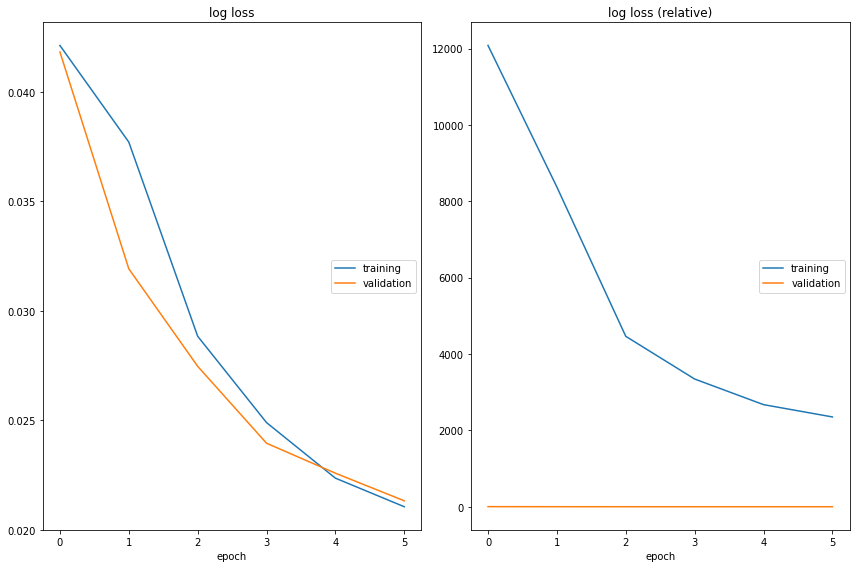

log loss
	training         	 (min:    0.021, max:    0.042, cur:    0.021)
	validation       	 (min:    0.021, max:    0.042, cur:    0.021)
log loss (relative)
	training         	 (min: 2352.359, max: 12081.184, cur: 2352.359)
	validation       	 (min:    0.632, max:    3.097, cur:    0.632)
Epoch:  5 | train loss: 2.104977e-02 | valid loss: 2.132061e-02 
      	| train loss (relative): 2.352359e+03 | valid loss (relative): 6.324819e-01 
Epoch 5 use: 9.21 second.

epoch 6 starting......


KeyboardInterrupt: ignored

In [ ]:
autoencoder = train_model(autoencoder, 
                          train_loader = train_loader,
                          valid_loader = valid_loader,
                          test_loader = test_loader,
                          state_load = None,
                          n_epochs = 4000, 
                          lr = 1e-4,
                          sfcstoshuffle = asfcs,
                          isfcstoshuffle = iasfcs,
                          seed = seed,
                          checksfcs = True,
                          optimizer = 'Adam',
                          adaptive = True)

In [ ]:
# torch.save(autoencoder.state_dict(),"AdaptiveChangingPaddingsTrained.pth")

In [ ]:
# autoencoder.load_state_dict(torch.load("AdaptiveChangingPaddingsTrained.pth"))

<All keys matched successfully>

In [ ]:
# added functions to output vtu files from reconstruct
model_device = torch.device('cuda')
autoencoder = autoencoder.to(model_device)
save_path = 'reconstructed_FPC_CG_Adaptive'
import os
os.system(F'mkdir -p {save_path}')

In [ ]:
data_path = 'FPC_Re3900_CG_new/'
vtu_fields = ['Velocity']

In [ ]:
# result_vtu_to_vtu(data_path, save_path, vtu_fields, autoencoder, k.detach().numpy(), b.detach().numpy(), model_device = model_device)

In [ ]:
#This cell saves the reconstruction of the first 400 snapshots of the full tensor, adaptive

for i in range(400):
  batch = full_tensor[i].unsqueeze(0)
  indices = np.array([4+np.random.randint(0,9) for i in range(autoencoder.encoder.sfc_nums)])
  sfcs = np.asarray(batch[0,indices,:].int())
  isfcs = np.asarray(batch[0,10+indices,:].int())
  autoencoder.set_sfcs(sfcs,isfcs)
  result = autoencoder(batch[:,:4,:].to("cuda")).mul(0.1)
  point_data = {}
  point_data.update({"Velocity":result[0].permute(1,0).cpu().detach().numpy()})
  mesh = meshio.Mesh(coords[i],cells[i],point_data)
  mesh.write("reconstructed_FPC_CG_Adaptive/reconstructed" + str(i) + ".vtu")